<a href="https://colab.research.google.com/github/tvaditya/AndroidProjects/blob/master/C%C3%B3pia_de_C%C3%B3pia_de_Futebol_com_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret -q

     |████████████████████████████████| 319 kB 5.2 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 167 kB 51.6 MB/s 
     |████████████████████████████████| 1.3 MB 55.2 MB/s 
     |████████████████████████████████| 261 kB 58.9 MB/s 
     |████████████████████████████████| 116 kB 57.0 MB/s 
     |████████████████████████████████| 16.5 MB 51.4 MB/s 
     |████████████████████████████████| 6.8 MB 8.0 MB/s 
     |████████████████████████████████| 2.0 MB 32.1 MB/s 
     |████████████████████████████████| 1.7 MB 38.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 3.4 MB/s 
     |████████████████████████████████| 690 kB 54.0 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 10.9 MB 38.4 MB/s 
     |███████████████████

In [2]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("resultado_new.csv")

In [5]:
data = df

In [6]:
test = data.sample(frac=0.30)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [7]:
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
# clf = setup(data=train, target='Result')

In [8]:
clf = setup(data = data,
            target = 'Result',
            normalize = True,
            transformation = True, 
            ignore_low_variance = True,
            # remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            log_experiment = True,
            experiment_name = 'football_results_01')

,Description,Value
0,session_id,1938
1,Target,Result
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(380, 39)"
5,Missing Values,False
6,Numeric Features,34
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


2022/04/04 23:12:10 INFO mlflow.tracking.fluent: Experiment with name 'football_results_01' does not exist. Creating a new experiment.


In [9]:
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.4640,0.6073,0.3897,0.3981,0.4117,0.1145,0.1234,0.465
dummy,Dummy Classifier,0.4567,0.5000,0.3333,0.2087,0.2864,0.0000,0.0000,0.015
rf,Random Forest Classifier,0.4456,0.5846,0.3750,0.3863,0.3930,0.0801,0.0923,0.511
dt,Decision Tree Classifier,0.4377,0.5651,0.4130,0.4411,0.4333,0.1267,0.1285,0.019
knn,K Neighbors Classifier,0.4265,0.5179,0.3663,0.4059,0.3862,0.0594,0.0640,0.116
gbc,Gradient Boosting Classifier,0.4158,0.5733,0.3773,0.4030,0.3990,0.0756,0.0784,0.559
lr,Logistic Regression,0.4077,0.5384,0.3540,0.3710,0.3832,0.0550,0.0571,0.347
lda,Linear Discriminant Analysis,0.4071,0.5568,0.3703,0.3970,0.3971,0.0761,0.0771,0.022
ridge,Ridge Classifier,0.3996,0.0000,0.3499,0.3762,0.3795,0.0473,0.0492,0.015
svm,SVM - Linear Kernel,0.3960,0.0000,0.3554,0.3821,0.3833,0.0552,0.0553,0.062


In [10]:
print(best)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1938, verbose=0,
                     warm_start=False)


In [11]:
et = create_model('et')
print(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5556,0.6510,0.4947,0.5301,0.5334,0.2620,0.2681
1,0.4815,0.5275,0.3948,0.4365,0.4033,0.1230,0.1490
2,0.4074,0.5440,0.3472,0.3704,0.3810,0.0485,0.0499
3,0.4444,0.5260,0.3611,0.3302,0.3605,0.0581,0.0711
4,0.4815,0.7106,0.4087,0.4250,0.4383,0.1581,0.1659
5,0.5385,0.7389,0.4881,0.5312,0.5021,0.2554,0.2685
6,0.4231,0.5996,0.3651,0.3359,0.3745,0.0692,0.0728
7,0.4615,0.5934,0.3730,0.3385,0.3782,0.0761,0.0911
8,0.4231,0.5105,0.3452,0.3756,0.3940,0.0692,0.0705


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1938, verbose=0,
                     warm_start=False)


In [12]:
tuned_et = tune_model(et, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4815,0.5782,0.3494,0.3793,0.3634,0.0258,0.0466
1,0.4444,0.5597,0.3333,0.2051,0.2807,0.0098,0.0255
2,0.4444,0.4576,0.3611,0.3414,0.3527,0.0380,0.0543
3,0.4444,0.6035,0.3333,0.2051,0.2807,0.0098,0.0255
4,0.4815,0.6574,0.3889,0.4012,0.3793,0.0935,0.1496
5,0.5000,0.6794,0.4008,0.3436,0.4001,0.1421,0.1735
6,0.5385,0.6249,0.4683,0.3968,0.4516,0.2180,0.2561
7,0.5385,0.6531,0.4484,0.4033,0.4423,0.1979,0.2551
8,0.4231,0.5698,0.3254,0.2771,0.3204,-0.0156,-0.0217


In [13]:
print(tuned_et)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                     criterion='gini', max_depth=3, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0001, min_impurity_split=None,
                     min_samples_leaf=4, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                     oob_score=False, random_state=1938, verbose=0,
                     warm_start=False)


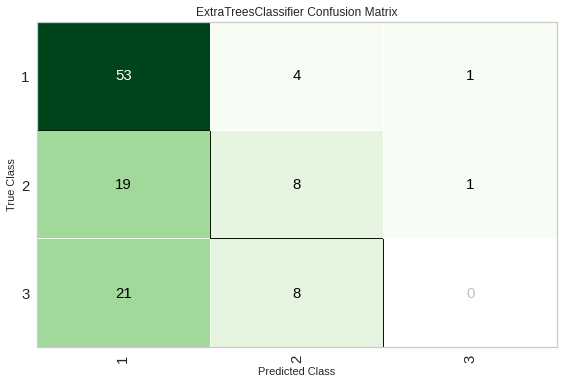

In [14]:
plot_model(tuned_et, plot='confusion_matrix')

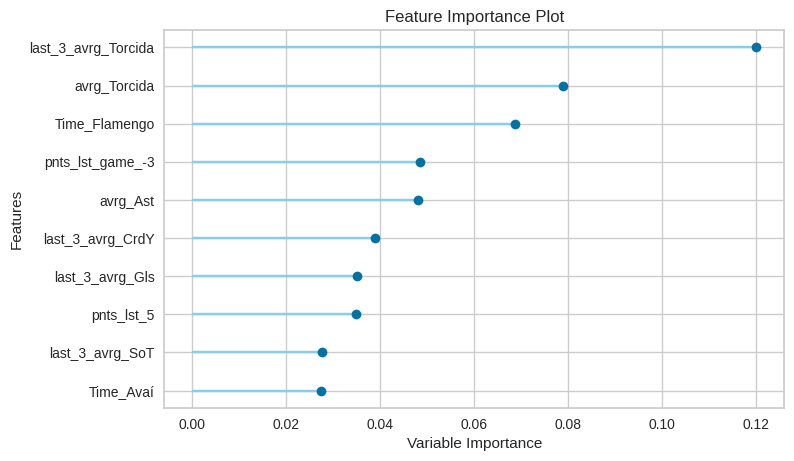

In [15]:
plot_model(tuned_et, plot='feature')

In [16]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# predict_model(tuned_rf);

In [17]:
predictions = predict_model(tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.5304,0.6163,0.3998,0.3848,0.4352,0.1391,0.1711


IndexError: ignored

In [ ]:
predictions.head()

,avrg_Gls,last_3_avrg_Gls,avrg_Ast,last_3_avrg_Ast,avrg_PK,last_3_avrg_PK,avrg_PKatt,last_3_avrg_PKatt,avrg_Sh,last_3_avrg_Sh,...,pnts_lst_game_-1,pnts_lst_game_-2,pnts_lst_game_-3,pnts_lst_game_0,pnts_lst_game_1,pnts_lst_game_2,pnts_lst_game_3,Result,Label,Score
0,1.726512,2.037311,2.158391,1.711922,0.838264,1.300463,0.652222,1.196387,0.588401,-0.499119,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.2868
1,-4.808780,-3.971972,-6.006263,-5.033906,-0.059771,-0.021276,-0.008856,0.001770,-2.830112,-2.311595,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,1,0.2868
2,-1.447195,-1.089282,-1.253778,-0.988558,-0.059771,-0.021276,-0.008856,0.001770,-0.216103,-0.144074,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,0.2868
3,-0.018946,-0.012649,-0.659127,-0.515153,3.538786,1.300463,2.455609,1.196387,0.957311,0.634344,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,0.2868
4,2.061891,1.608166,2.526890,1.109576,0.262825,1.300463,0.235465,1.196387,0.032257,0.799540,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.2868


In [ ]:
predictions.Label.unique()

array([1])

In [19]:
final_et = finalize_model(tuned_et)

In [20]:
# test_preds = predict_model(final_rf, data=test)
save_model(final_et,'Modelo_Final_Futebol_et_2022_04_04')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['Unnamed: 0'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Result',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                  ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight={}, criterion='gini',
                                       max_depth=3, max_features=1.0,
                                       max_leaf_nodes=None,

In [ ]:
# carregando um modelo salvo
saved_final_gbr = load_model('Modelo_Final_Futebol_et_2022_04_04')